Team
<br> 171EC146 Sathvik S Prabhu 
<br> 171EC141 Rithvik Shetty 
<br> 171EC211 Chinmaya H N 

Q.1.(a) Write python from scratch for 2D Linear convolution sing Toeplitz matrix method between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [1]:
import numpy as np
import time
from scipy import signal

#a
i=np.array([[1,2,3],[4,5,6],[7,8,9]])
f2=f=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

print("Input=\n",i,"\nFilter=\n",f)

def convolv2D(i,f):
    result_shape=[i.shape[0]+f.shape[0]-1,i.shape[1]+f.shape[1]-1]
    H_size=[result_shape[0]*result_shape[1], np.size(i)]
    print("\nResult shape: ",result_shape)
    
    # Padding filter with zeros
    f1=np.zeros(result_shape)
    f1[0:f.shape[0],0:f.shape[1]] = f

    #Convert input to vector
    inp_vector = i.flatten()

    h=np.zeros((f1.shape[0],f1.shape[1],i.shape[1]))
    for row in range(f1.shape[0]):    
        for col in range(i.shape[1]):
            h[row,:,col]=np.roll(f1[row,:],col).transpose()

    #print("Computing")
    H = np.hstack(np.concatenate(([h[0]],h[::-1][:i.shape[0]-1]),axis=0))
    result = np.array([])
    result = np.append(result,np.matmul(H, inp_vector))
    for ctr in range(1,h.shape[0]):
        H = np.hstack((h[ctr],H[:,:-i.shape[1]]))
        result = np.append(result, np.matmul(H, inp_vector))

    result = result.reshape(result_shape)
    
    return H_size,result

t10=time.time()
H_size1,result=convolv2D(i,f)
t11=time.time()
print("Result:\n",result)

# Scipy method
t20=time.time()
result_scipy=signal.convolve2d(i,f2)
t21=time.time()
print("Scipy result:\n",result_scipy)

Input=
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
Filter=
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

Result shape:  [5, 5]
Result:
 [[  1.   4.   8.   8.   3.]
 [  4.  13.  20.  17.   6.]
 [  6.  18.  24.  18.   6.]
 [ -4. -13. -20. -17.  -6.]
 [ -7. -22. -32. -26.  -9.]]
Scipy result:
 [[  1   4   8   8   3]
 [  4  13  20  17   6]
 [  6  18  24  18   6]
 [ -4 -13 -20 -17  -6]
 [ -7 -22 -32 -26  -9]]


In [8]:
x=np.array([[2,5,3],[4,1,4],[1,4,1]])
y=np.array([[1,-1],[1,1]])
signal.convolve2d(x,y)

array([[ 2,  3, -2, -3],
       [ 6,  4, 11, -1],
       [ 5,  8,  2,  3],
       [ 1,  5,  5,  1]])

(b).Write python from scratch for 2D Linear convolution by Toeplitz matrix method between input image(lena.jpg) and kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16

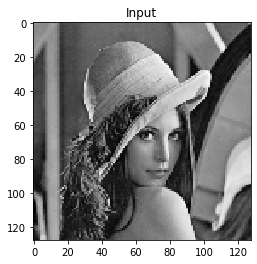


Result shape:  [130, 130]


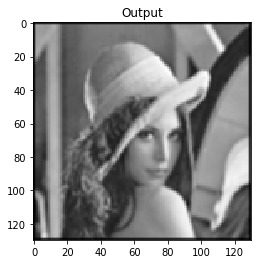

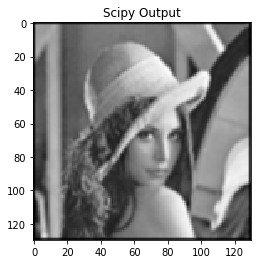

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import time

i=cv2.imread('lena.jpg',0)
i = cv2.resize(i, (128, 128)) # Resizing to avoid memory allocation error
plt.imshow(i,"gray")
plt.title("Input")
plt.show()

f=np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16

t30 = time.time()
H_size2, result = convolv2D(i,f)
t31 = time.time()

plt.imshow(result,"gray")
plt.title("Output")
plt.show()

# Scipy method
t40=time.time()
result_scipy=signal.convolve2d(i,f)
t41=time.time()
# print("Scipy Result:\n",result_scipy)
plt.imshow(result_scipy,"gray")
plt.title("Scipy Output")
plt.show()

(c) Compute number of multiplications required for 2D  linear convolution convolution

In [4]:
# No. of multiplications = No. of multiplications in the matrix multiplication step
# = Multiplications per row * No. of rows
# = H_size[1]*H_size[0]

print("a:",H_size1[1]*H_size1[0])
print("b:",H_size2[1]*H_size2[0])
 

a: 225
b: 276889600


(d) Plot processing time comparison graph between your method and Scipy 2D convolution method

Processing Time
Our method : 0.008254051208496094
Scipy : 0.0005724430084228516


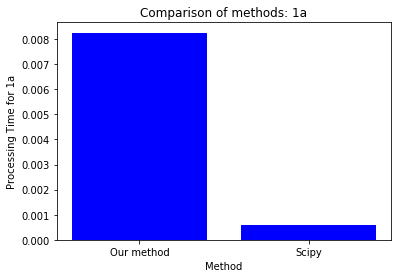



Processing Time
Our method : 1.2589194774627686
Scipy : 0.00116729736328125


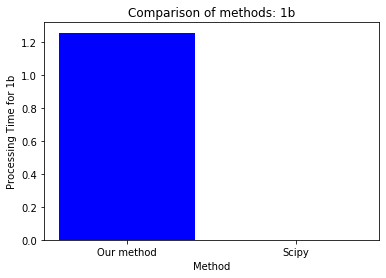

In [5]:
# Processing time Comparison
print("Processing Time\nOur method : {}\nScipy : {}".format(t11-t10,t21-t20))
x=["Our method","Scipy"]
t=[t11-t10,t21-t20]
plt.bar(x,t,color="blue")
plt.xlabel("Method")
plt.ylabel("Processing Time for 1a")
plt.title("Comparison of methods: 1a")
plt.show()

print("\n\nProcessing Time\nOur method : {}\nScipy : {}".format(t31-t30,t41-t40))
x=["Our method","Scipy"]
t=[t31-t30,t41-t40]
plt.bar(x,t,color="blue")
plt.xlabel("Method")
plt.ylabel("Processing Time for 1b")
plt.title("Comparison of methods: 1b")
plt.show()

Q. 2. (a)Write python from scratch for 2D Spatial Separable convolution between input image(lena.jpg) and Gausian filter = np.array ([1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1])/256



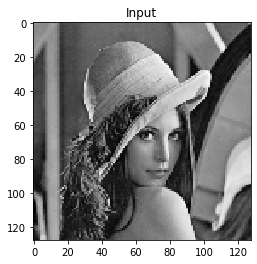

(128, 128)
N: 128 M: 5
Matrix is separable


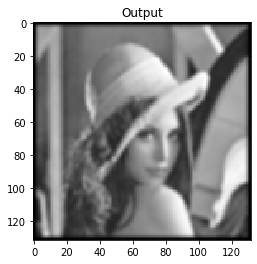

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

x=cv2.imread('lena.jpg',0)
x = cv2.resize(x, (128, 128)) # Resizing to avoid memory allocation error
plt.imshow(x,"gray")
plt.title("Input")
plt.show()
print(x.shape)

h=np.array([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])/256
# print(h.shape)
# print("Filter:\n",h)

def conv2D_SS(x,h):
    n=x.shape[0]
    m=h.shape[0]
    print("N:",n,"M:",m)

    # Separating h into h1 and h2
    def split_matrix(h):
        m,n=h.shape
        h1=np.zeros(m)
        h2=np.zeros(n)

        h1[0]=1
        for col in range(n):
            h2[col]=h[0,col]
        for row in range(1,m):
            h1[row]=h[row,0]/h2[0]
        if(np.allclose(np.matmul(h1.reshape(m,1),h2.reshape(1,n)),h)):
            print("Matrix is separable")
        else:
            print("Matrix is not separable")
        return h1,h2

    h1,h2=split_matrix(h)

    # 1D conv function
    def conv1D(x,h):
        y_len=len(x)+len(h)-1
        y=np.zeros(y_len)
        h=np.append(h,np.zeros(len(x)))
        for n in range(y_len):
            for k in range(len(x)):
                y[n]=y[n]+x[k]*h[n-k]

        return y

    # Column wise 1D convolution
    g=np.zeros((n+m-1,n))
    for col in range(n):
        g[:,col]=conv1D(x[:,col],h2)

    # Row wise 1D convolution
    y=np.zeros((n+m-1,n+m-1))
    for row in range(n+m-1):
        y[row,:]=conv1D(g[row,:],h1)
    
    return y

# Result
y=conv2D_SS(x,h)
# print("Result:\n",y)
plt.imshow(y,"gray")
plt.title("Output")
plt.show()

(b) Compute number of multiplications required for 2D Spatial Separable convolution

In [10]:
# No. of multiplications required
n=x.shape[0]
m=h.shape[0]
result=n*n*m + (n+m-1)*(n*m)
print("No. of multiplications required: ",result)

No. of multiplications required:  166400


Q. 3.(a) Write python from scratch to convert RGB Image (lena.tif) to YUV color image using mathematical equation discussed in the class.
   
(b) Write python from scratch to convert  YUV  Image ( part(a)) to RGB color image using mathematical equation discussed in the class.

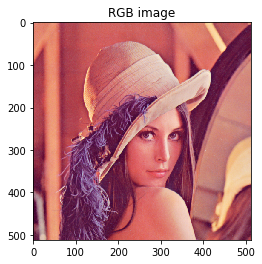

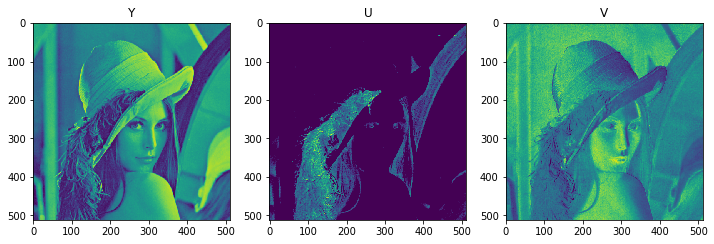

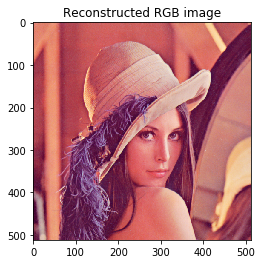

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def rgb2yuv(r,g,b):
    y= 0.299*r + 0.587*g + 0.114*b
    u= -0.147*r - 0.289*g + 0.436*b
    v= 0.615*r - 0.515*g - 0.100*b
    return y,u,v

def yuv2rgb(y,u,v):
    r=y+1.14*v
    g=y-0.394*u-0.581*v
    b=y+2.032*u
    return r,g,b
    
# Reading the image
img=cv2.imread('lenna.tif')
b,g,r=cv2.split(img)
img_rgb=cv2.merge((r,g,b))
plt.imshow(img_rgb)
plt.title('RGB image')
plt.show()
s=img.shape
#print(s)

y,u,v = rgb2yuv(r,g,b)
f, axarr = plt.subplots(1,3,figsize=(12, 12))
axarr[0].imshow(np.clip(y,0,255).astype(int))
axarr[0].set_title("Y")
axarr[1].imshow(np.clip(u,0,255).astype(int))
axarr[1].set_title("U")
axarr[2].imshow(np.clip(v,0,255).astype(int))
axarr[2].set_title("V")
plt.show()


r1,g1,b1 = yuv2rgb(y,u,v)
img_rgb1=cv2.merge((r1.astype(int),g1.astype(int),b1.astype(int)))
plt.imshow(img_rgb1)
plt.title('Reconstructed RGB image')
plt.show()



 Q. 4. (a) Write python from scratch to convert RGB Image (lena.jpg)  to YCrCb color image using mathematical equation discussed in the class.

 (b) Write python from scratch to convert   YCrCb  Image ( part(a)) to RGB color image using mathematical equation discussed in the class.

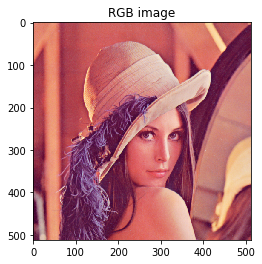

(512, 512, 3)


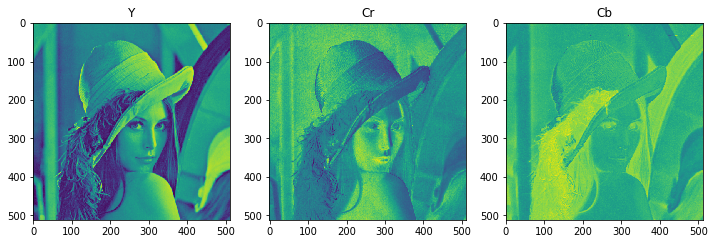

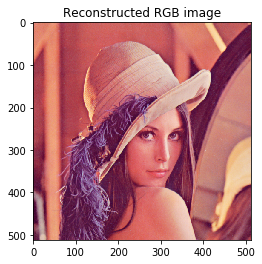

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def rgb2ycrcb(r,g,b):
    y= 0.257*r+0.504*g+0.098*b+16
    cb = -0.148*r-0.291*g+0.439*b+128
    cr = 0.439*r-0.368*g-0.071*b+128
    return y,cr,cb

def ycrcb2rgb(y,cr,cb):
    r=1.164*(y-16)+1.596*(cr-128)
    g=1.164*(y-16)-0.813*(cr-128)-0.392*(cb-128)
    b=1.164*(y-16)+2.017*(cb-128)
    return r,g,b

# Reading the image
img=cv2.imread('lenna.tif')
b,g,r=cv2.split(img)
img_rgb=cv2.merge((r,g,b))
plt.imshow(img_rgb)
plt.title('RGB image')
plt.show()
s=img.shape
print(s)

y,cr,cb = rgb2ycrcb(r,g,b)
f, axarr = plt.subplots(1,3,figsize=(12, 12))
axarr[0].imshow(np.clip(y,0,255).astype(int))
axarr[0].set_title("Y")
axarr[1].imshow(np.clip(cr,0,255).astype(int))
axarr[1].set_title("Cr")
axarr[2].imshow(np.clip(cb,0,255).astype(int))
axarr[2].set_title("Cb")
plt.show()

r1,g1,b1 = ycrcb2rgb(y,cr,cb)
img_rgb1=cv2.merge((r1.astype(int),g1.astype(int),b1.astype(int)))
plt.imshow(img_rgb1)
plt.title('Reconstructed RGB image')
plt.show()

  Q. 5. (a) Write python from scratch to convert RGB Image (lena.jpg)  to HSV color image using mathematical equation discussed in the class.

 (b) Write python from scratch to convert  HSV  Image ( part(a)) to RGB color image using mathematical equation discussed in the class.

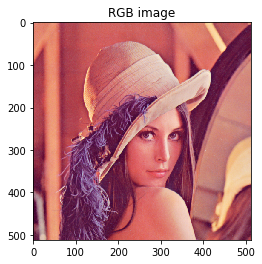

(512, 512, 3)


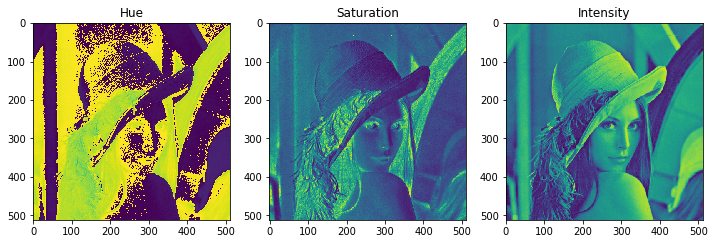

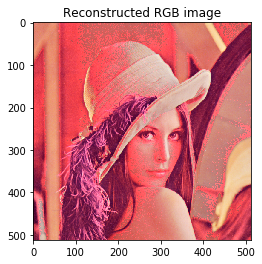

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def rgb2hsi(r1,g1,b1):
    with np.errstate(divide='ignore'):
        theta = np.arccos((((r1-g1) + (r1-b1))/2)/np.sqrt((r1-g1)*(r1-g1) + (r1-b1)*(g1-b1)))
    
    h = np.where(b1<=g1, theta, (2*np.pi)-theta)
    s = 1 - (np.minimum(np.minimum(r1,g1),b1)*3)/(r1+g1+b1)
    i = (r1+g1+b1)/3
    return h,s,i

def hsi2rgb(h,s,i):
    r = np.zeros(h.shape) 
    g = np.zeros(h.shape)
    b = np.zeros(h.shape)
    
    c1 = np.argwhere((h>=0) & (h<((2*np.pi)/3)))
    for x,y in c1:
        r[x,y] = i[x,y] * (1 + (s[x,y]*np.cos(h[x,y])/np.cos((np.pi/3)-h[x,y])))
        b[x,y] = i[x,y]*(1-s[x,y])
        g[x,y] = 3*i[x,y] - (r[x,y]+b[x,y])
        
    c1 = np.argwhere((h>=((2*np.pi)/3)) & (h<((4*np.pi)/3)))
    for x,y in c1:
        h1 = h[x,y] - ((2*np.pi)/3)
        g[x,y] = i[x,y] * (1 + (s[x,y]*np.cos(h1)/np.cos((np.pi/3)-h1)))
        r[x,y] = i[x,y]*(1-s[x,y])
        b[x,y] = 3*i[x,y] - (r[x,y]+b[x,y])
        
    c1 = np.argwhere((h>=((4*np.pi)/3)) & (h<(2*np.pi)))
    for x,y in c1:
        h1 = h[x,y] - ((4*np.pi)/3)
        b[x,y] = i[x,y] * (1 + (s[x,y]*np.cos(h1)/np.cos((np.pi/3)-h1)))
        g[x,y] = i[x,y]*(1-s[x,y])
        r[x,y] = 3*i[x,y] - (r[x,y]+b[x,y])
    
    return r,g,b

# Reading the image
img=cv2.imread('lenna.tif')
b,g,r=cv2.split(img)
img_rgb=cv2.merge((r,g,b))
plt.imshow(img_rgb)
plt.title('RGB image')
plt.show()
img_shape=img.shape
print(img_shape)

h,s,i = rgb2hsi(r/255,g/255,b/255)
f, axarr = plt.subplots(1,3,figsize=(12, 12))
axarr[0].imshow(h)
axarr[0].set_title("Hue")
axarr[1].imshow(s)
axarr[1].set_title("Saturation")
axarr[2].imshow(i)
axarr[2].set_title("Intensity")
plt.show()


r,g,b = hsi2rgb(h,s,i)
img_rgb1=cv2.merge((np.clip(r,0,1),np.clip(g,0,1),np.clip(b,0,1)))
plt.imshow(img_rgb1)
plt.title('Reconstructed RGB image')
plt.show()

